In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [12]:
data <- read_csv("atp2017-2019.csv")
data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  tourney_id = col_character(),
  tourney_name = col_character(),
  surface = col_character(),
  tourney_level = col_character(),
  winner_seed = col_character(),
  winner_entry = col_character(),
  winner_name = col_character(),
  winner_hand = col_character(),
  winner_ioc = col_character(),
  loser_seed = col_character(),
  loser_entry = col_character(),
  loser_name = col_character(),
  loser_hand = col_character(),
  loser_ioc = col_character(),
  score = col_character(),
  round = col_character()
)

See spec(...) for full column specifications.



X1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275
6,2019-M020,Brisbane,Hard,32,A,20181231,294,105453,2,⋯,53,37,13,12,6,9,9,3590,19,1835
7,2019-M020,Brisbane,Hard,32,A,20181231,293,104542,NA,⋯,51,34,11,11,6,11,239,200,77,691
8,2019-M020,Brisbane,Hard,32,A,20181231,292,200282,7,⋯,39,30,3,9,3,6,31,1298,72,715


In [3]:
data <- data%>%
	select(winner_name, winner_hand, winner_ht, winner_ioc, winner_age, winner_rank)%>%
#the columns relevant to our analysis are selected using this select() function
	filter(!is.na(winner_ht), !is.na(winner_rank), !is.na(winner_age), !is.na(winner_ioc),
		!is.na(winner_hand))%>%
#the !is.na() argument in the filter() function eliminates NA values in the relevant
#columns
	mutate(winner_hand = as_factor(winner_hand), winner_ioc = as_factor(winner_ioc),
		winner_rank = as.double(winner_rank))%>%
#this mutate() function converts the relevant columns to appropriate data types
	distinct()
#the distinct() function eliminates identical rows, keeping only unique rows, and was
#used due to the fact that some tennis players return every year, causing repeats
data

winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank
<chr>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
Kei Nishikori,R,178,JPN,29.00479,9
Jo Wilfried Tsonga,R,188,FRA,33.70568,239
Jeremy Chardy,R,188,FRA,31.88227,40
Milos Raonic,R,196,CAN,28.01095,18
Grigor Dimitrov,R,188,BUL,27.62765,19
Andy Murray,R,190,GBR,31.63039,240
Nick Kyrgios,R,193,AUS,23.67967,35
John Millman,R,183,AUS,29.54689,38
Denis Kudla,R,180,USA,26.37098,63


In [4]:
data <- data%>%
    group_by(winner_name, winner_hand, winner_ht, winner_ioc)%>%
    summarize(number_of_wins = n(), winner_avg_age = mean(winner_age), winner_avg_rank = mean(winner_rank))%>%
    select(winner_name, winner_hand, winner_ht, winner_ioc, winner_avg_age, winner_avg_rank)
data <- mutate(data, winner_avg_age = round(winner_avg_age, 2))
data <- mutate(data, winner_avg_rank = round(winner_avg_rank, 2))
head(data, 6)


`summarise()` regrouping output by 'winner_name', 'winner_hand', 'winner_ht' (override with `.groups` argument)



winner_name,winner_hand,winner_ht,winner_ioc,winner_avg_age,winner_avg_rank
<chr>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
Adrian Mannarino,L,183,FRA,30.00,42.29
Albert Ramos,L,188,ESP,30.27,46.52
Alessandro Giannessi,L,183,ITA,27.39,137.00
Alexander Zverev,R,198,GER,21.11,7.51
Aljaz Bedene,R,181,SLO,28.80,66.42
Andreas Seppi,R,190,ITA,34.23,65.03


In [5]:
set.seed(9999) 

data_split <- initial_split(data, prop = 0.75, strata = winner_avg_rank)
data_train <- training(data_split)
data_test <- testing(data_split)

data_train

winner_name,winner_hand,winner_ht,winner_ioc,winner_avg_age,winner_avg_rank
<chr>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
Adrian Mannarino,L,183,FRA,30.00,42.29
Albert Ramos,L,188,ESP,30.27,46.52
Alessandro Giannessi,L,183,ITA,27.39,137.00
Aljaz Bedene,R,181,SLO,28.80,66.42
Andrej Martin,R,180,SVK,28.72,139.67
Andy Murray,R,190,GBR,31.05,209.12
Attila Balazs,R,180,HUN,30.28,191.00
Bernard Tomic,R,193,AUS,25.60,97.85
Blaz Kavcic,R,188,SLO,31.12,143.50


In [6]:
data_train_summarize <- data_train%>%
    tibble(number_of_players = 84, number_of_right_handed = 75, number_of_left_handed = 9, max_height = max(winner_ht), min_height = min(winner_ht), mean_height = mean(winner_ht),
          number_of_nationalities = 35, max_age = max(winner_avg_age), min_age = min(winner_avg_age), mean_age = mean(winner_avg_age), top_rank = min(winner_avg_rank),
          top_player = "Rafael Nadal", bottom_rank = max(winner_avg_rank), bottom_player = "Tommy Robredo")%>%
    select(number_of_players:bottom_player)%>%
    slice(1)
data_train_summarize

number_of_winner_hand <- data_train%>%
    group_by(winner_hand)%>%
    summarize(n())

nationality_analysis <- data_train%>%
    group_by(winner_ioc)%>%
    summarize(number = n())%>%
    nrow()

ranking <- data_train%>%
    group_by(winner_name)%>%
    summarize(winner_avg_rank)%>%
    arrange(winner_avg_rank)%>%
    slice(1, 84)

number_of_players,number_of_right_handed,number_of_left_handed,max_height,min_height,mean_height,number_of_nationalities,max_age,min_age,mean_age,top_rank,top_player,bottom_rank,bottom_player
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
84,75,9,208,170,185.75,35,39.08,23.02,30.02167,2.62,Rafael Nadal,386.8,Tommy Robredo


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



`summarise()` ungrouping output (override with `.groups` argument)



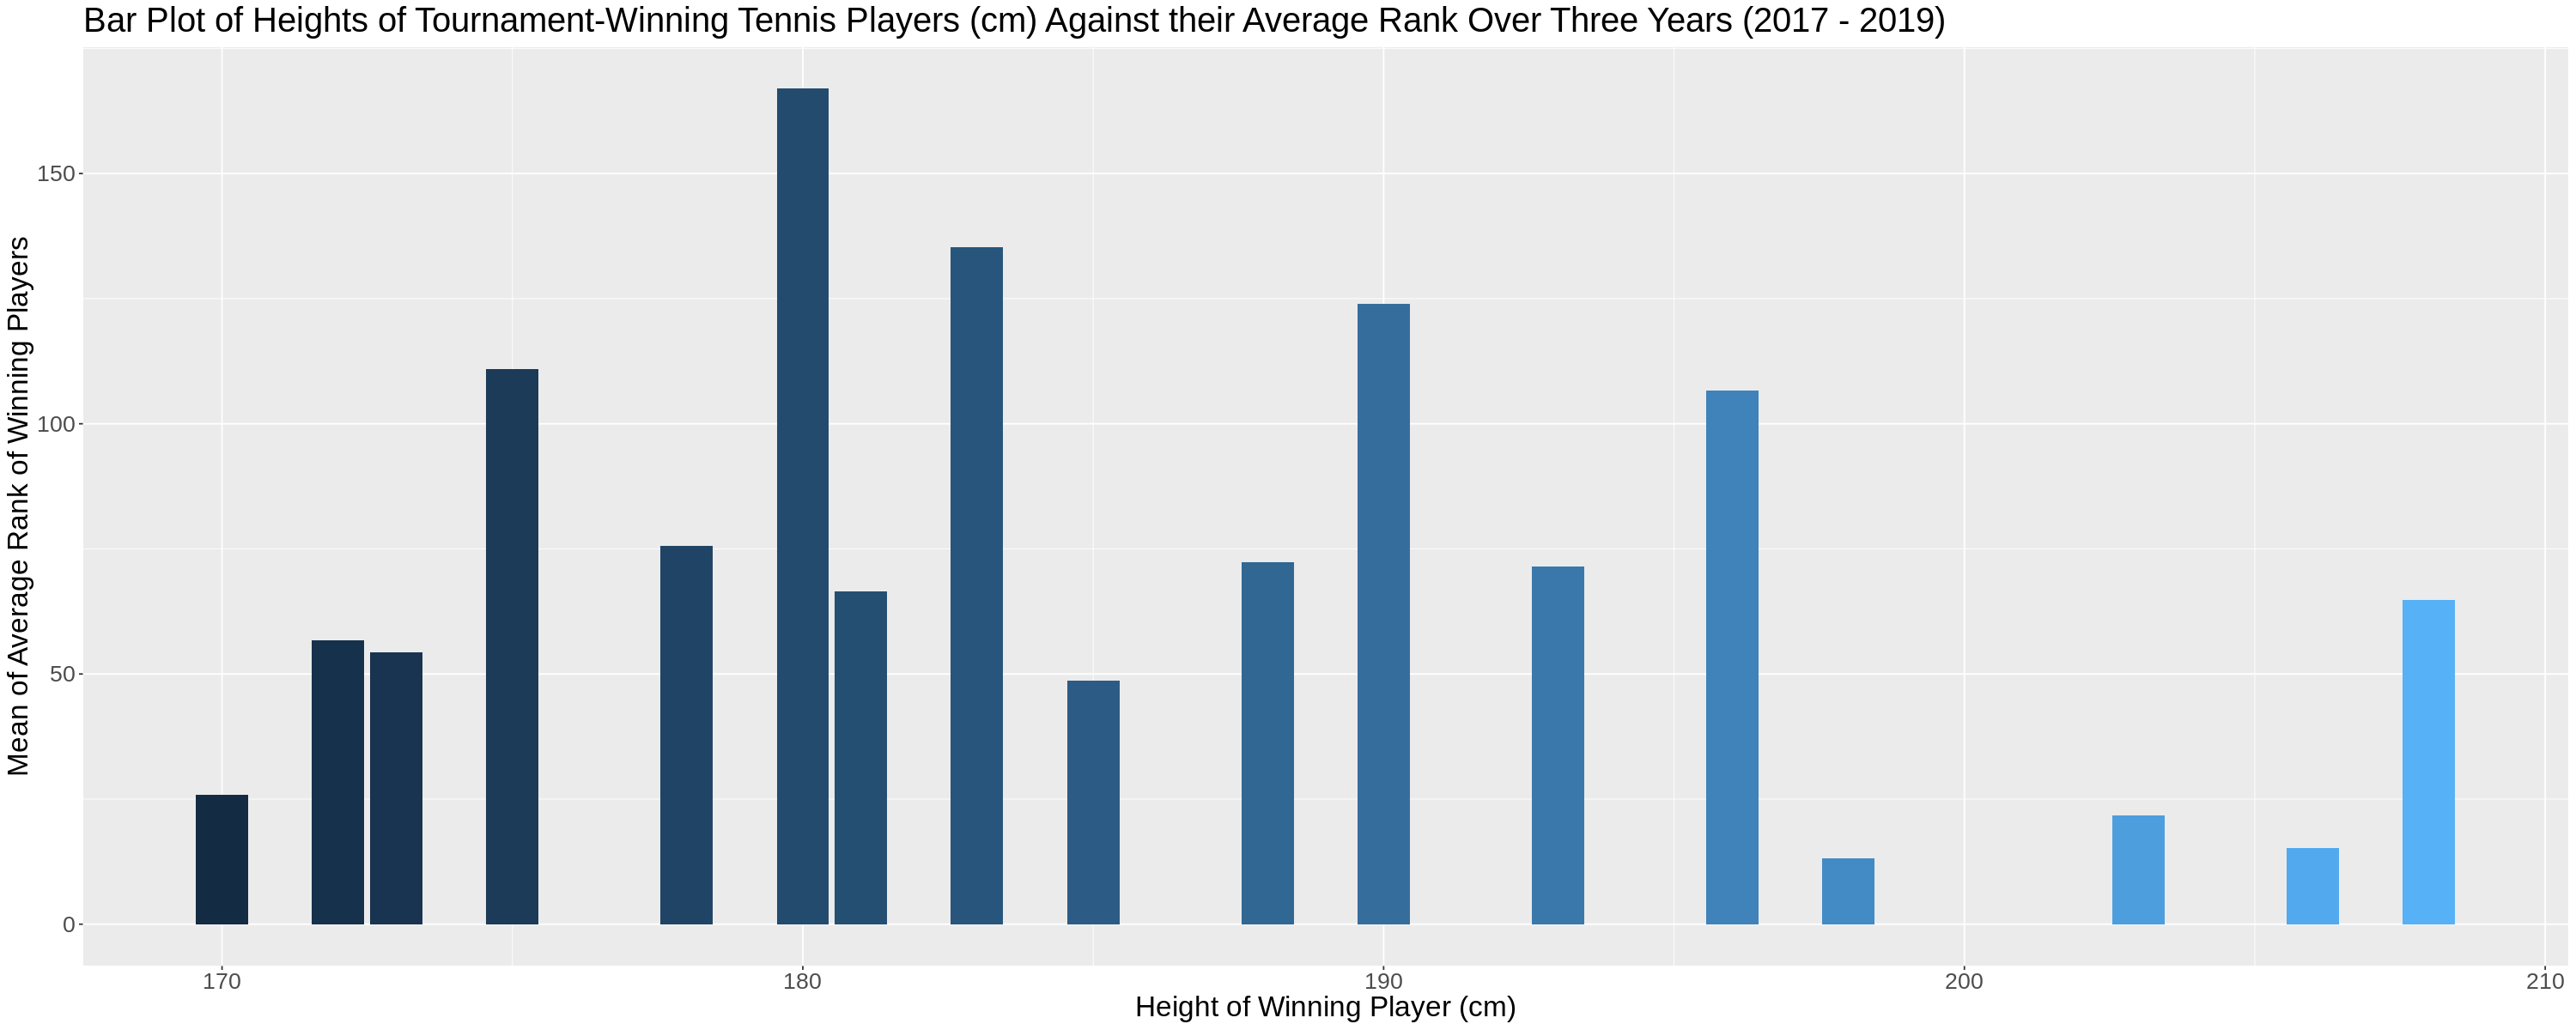

In [7]:
height_data <- data_train %>%
group_by(winner_ht) %>%
summarize(winner_avg_rank_avg = mean(winner_avg_rank))

options(repr.plot.width = 25, repr.plot.height = 10)
data_train_height_barplot <- height_data%>%
    ggplot(aes(x=winner_ht, y=winner_avg_rank_avg, fill = winner_ht))+
        geom_bar(stat = "identity", show.legend = FALSE)+
        labs(x="Height of Winning Player (cm)", y="Mean of Average Rank of Winning Players")+
        ggtitle("Bar Plot of Heights of Tournament-Winning Tennis Players (cm) Against their Average Rank Over Three Years (2017 - 2019)")+
        theme (text = element_text (size = 20))
data_train_height_barplot

In [8]:
options(repr.plot.width = 25, repr.plot.height = 10)
data_train_height_scatterplot <- data_train%>%
    ggplot(aes(x=winner_ht, y=winner_avg_rank))+
        geom_point()+
        labs(x="Height of Winning Player (cm)", y="Average Rank of Winning Player")+
        ggtitle("Scatterplot of Heights of Tournament-Winning Tennis Players (cm) Against their Average Rank Over Three Years (2017 - 2019)")+
        theme (text = element_text (size = 20))

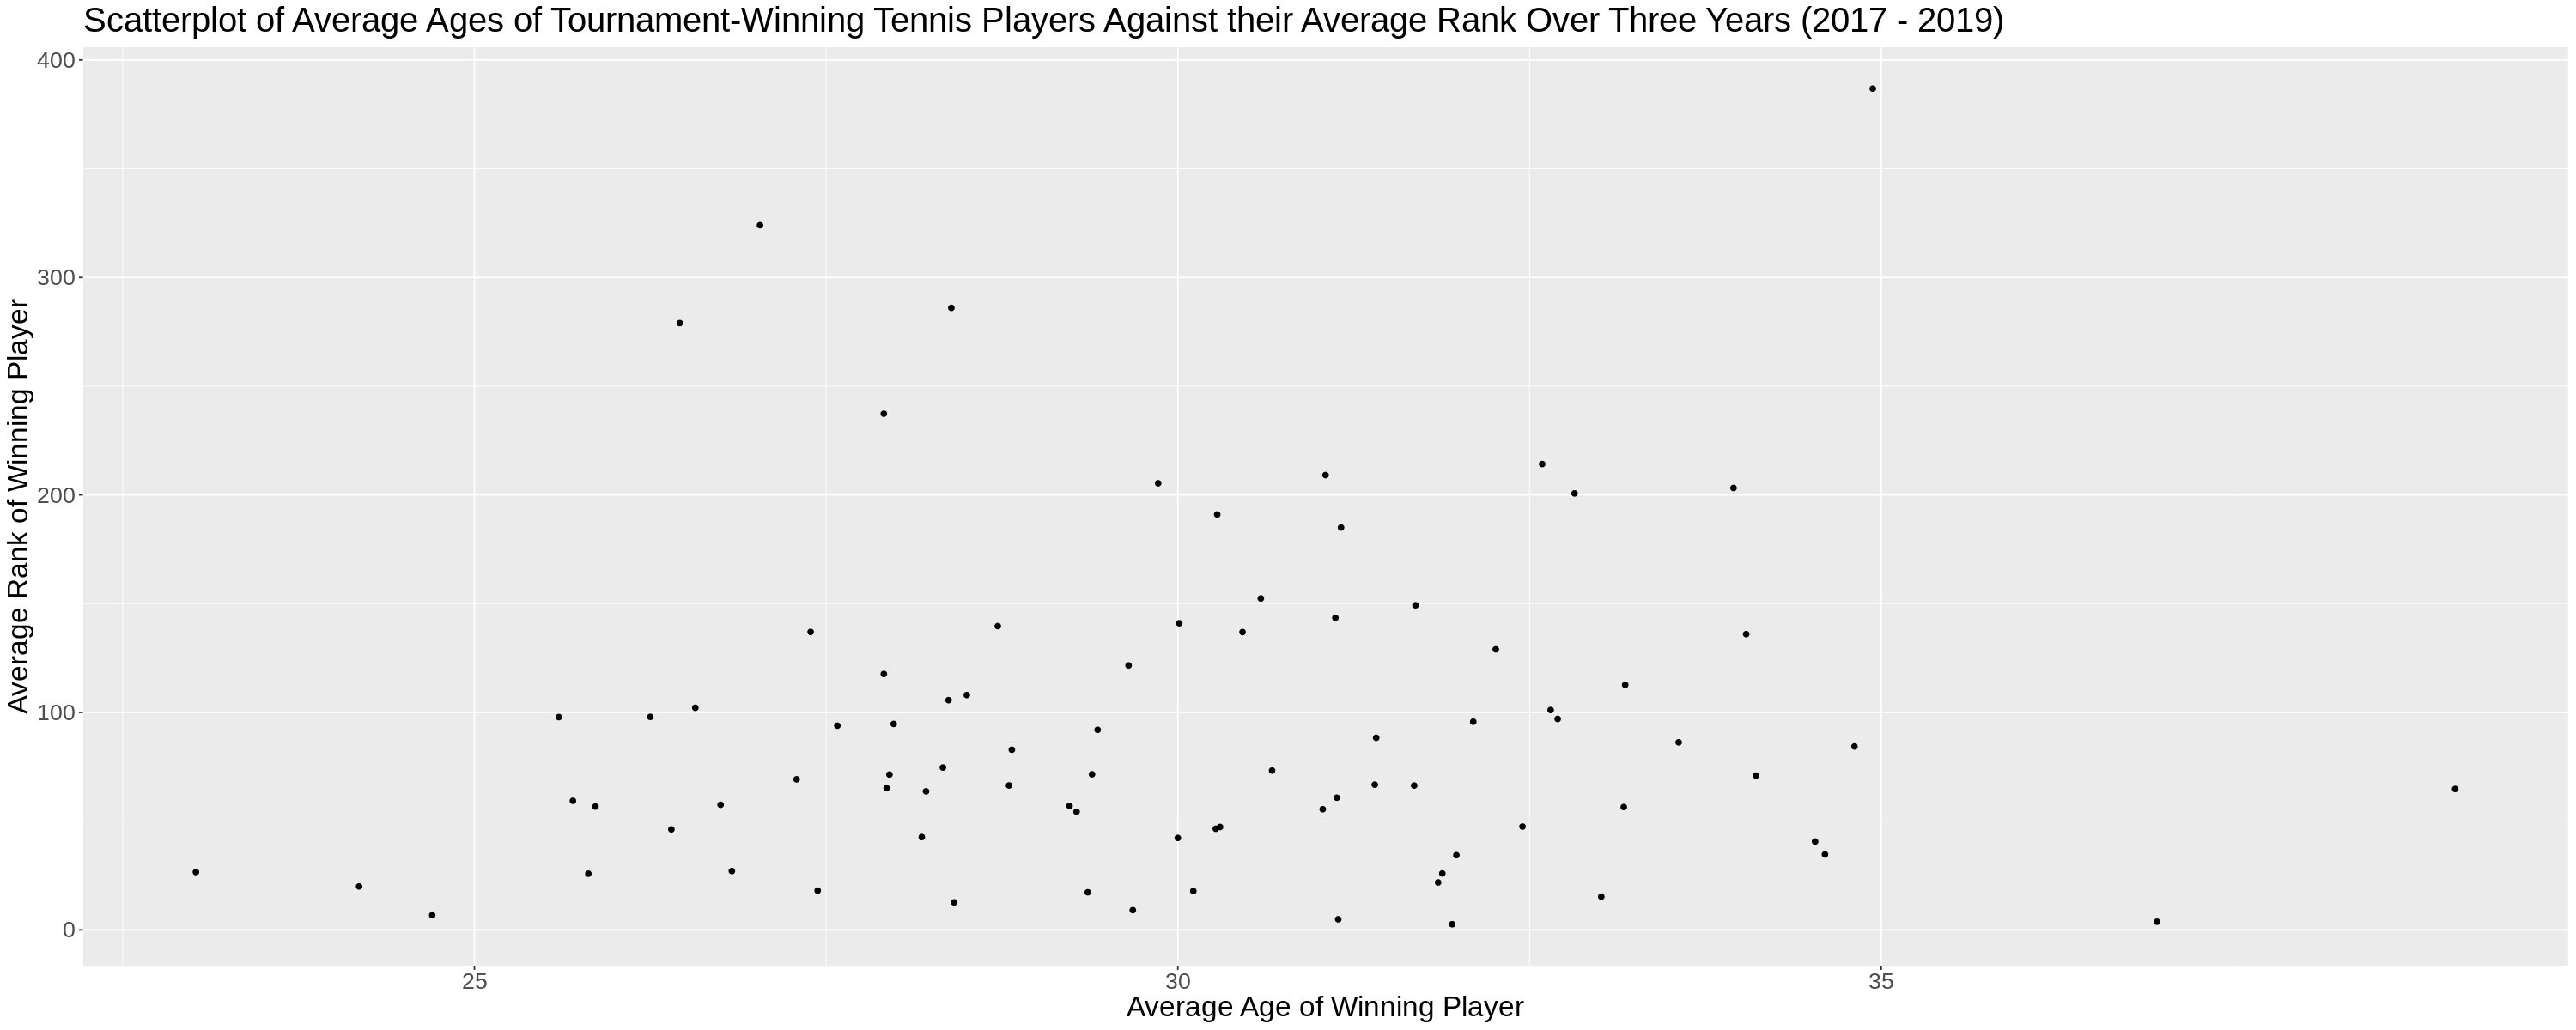

In [9]:
options(repr.plot.width = 25, repr.plot.height = 10)
data_train_age_scatterplot <- data_train%>%
    ggplot(aes(x=winner_avg_age, y=winner_avg_rank))+
        geom_point()+
        labs(x="Average Age of Winning Player", y="Average Rank of Winning Player")+
        ggtitle("Scatterplot of Average Ages of Tournament-Winning Tennis Players Against their Average Rank Over Three Years (2017 - 2019)")+
        theme (text = element_text (size = 20))
data_train_age_scatterplot

`summarise()` ungrouping output (override with `.groups` argument)



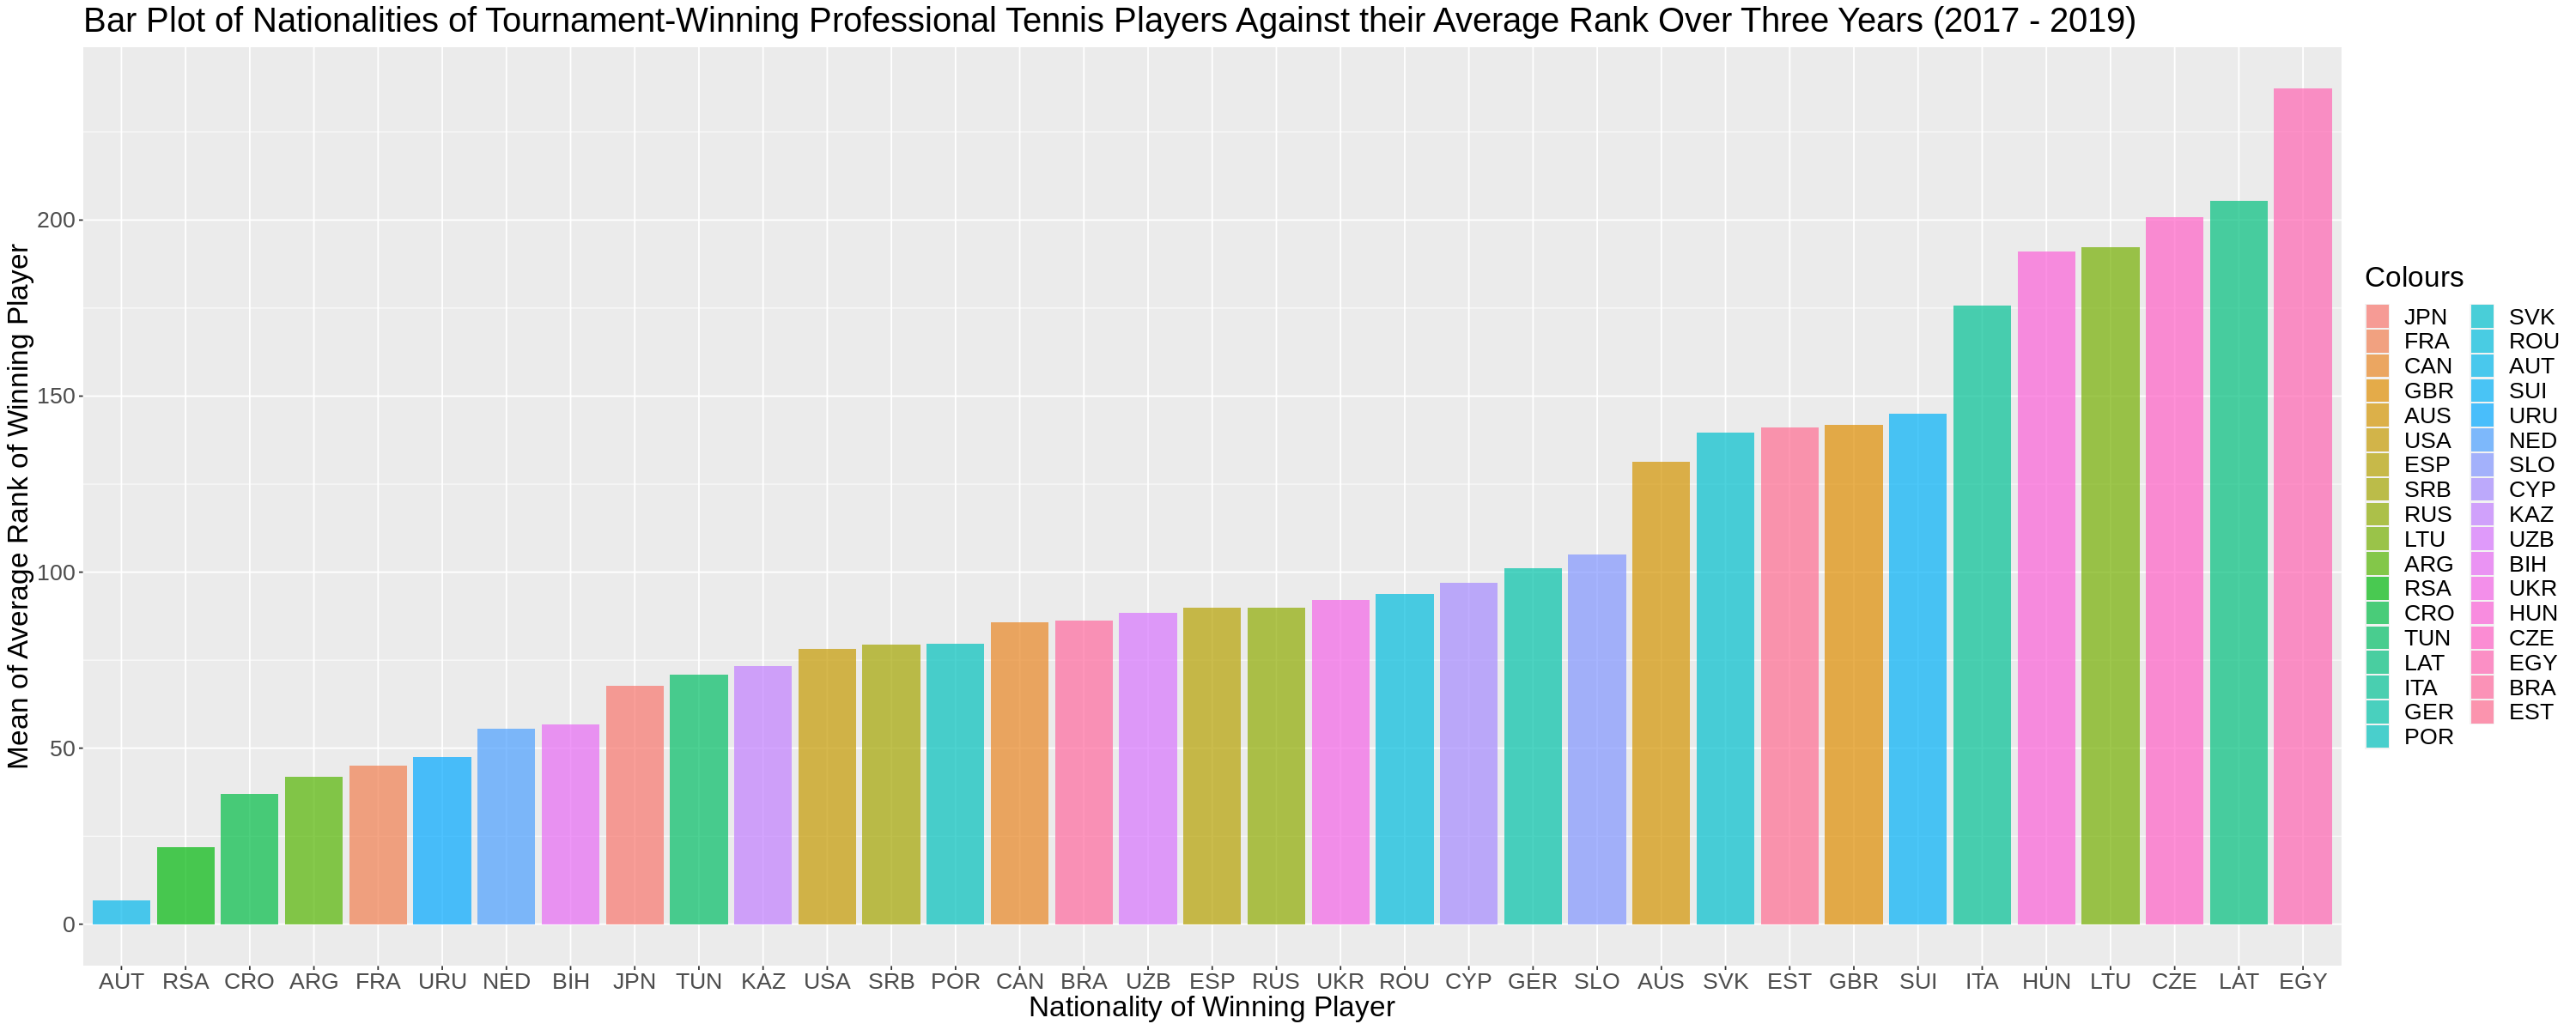

In [10]:
ioc_data <- data_train %>%
group_by(winner_ioc) %>%
summarize(winner_avg_rank_avg = mean(winner_avg_rank))

options(repr.plot.width = 25, repr.plot.height = 10)
data_train_nationality_barplot <- ioc_data %>%
    ggplot(aes(x=fct_reorder(winner_ioc, winner_avg_rank_avg, .desc = FALSE), y=winner_avg_rank_avg, fill = winner_ioc))+
        geom_bar(stat = "identity", alpha = 0.7)+
        labs(x="Nationality of Winning Player", y="Mean of Average Rank of Winning Player", fill = "Colours")+
        ggtitle("Bar Plot of Nationalities of Tournament-Winning Professional Tennis Players Against their Average Rank Over Three Years (2017 - 2019)")+
        theme (text = element_text (size = 20))
data_train_nationality_barplot

`summarise()` ungrouping output (override with `.groups` argument)



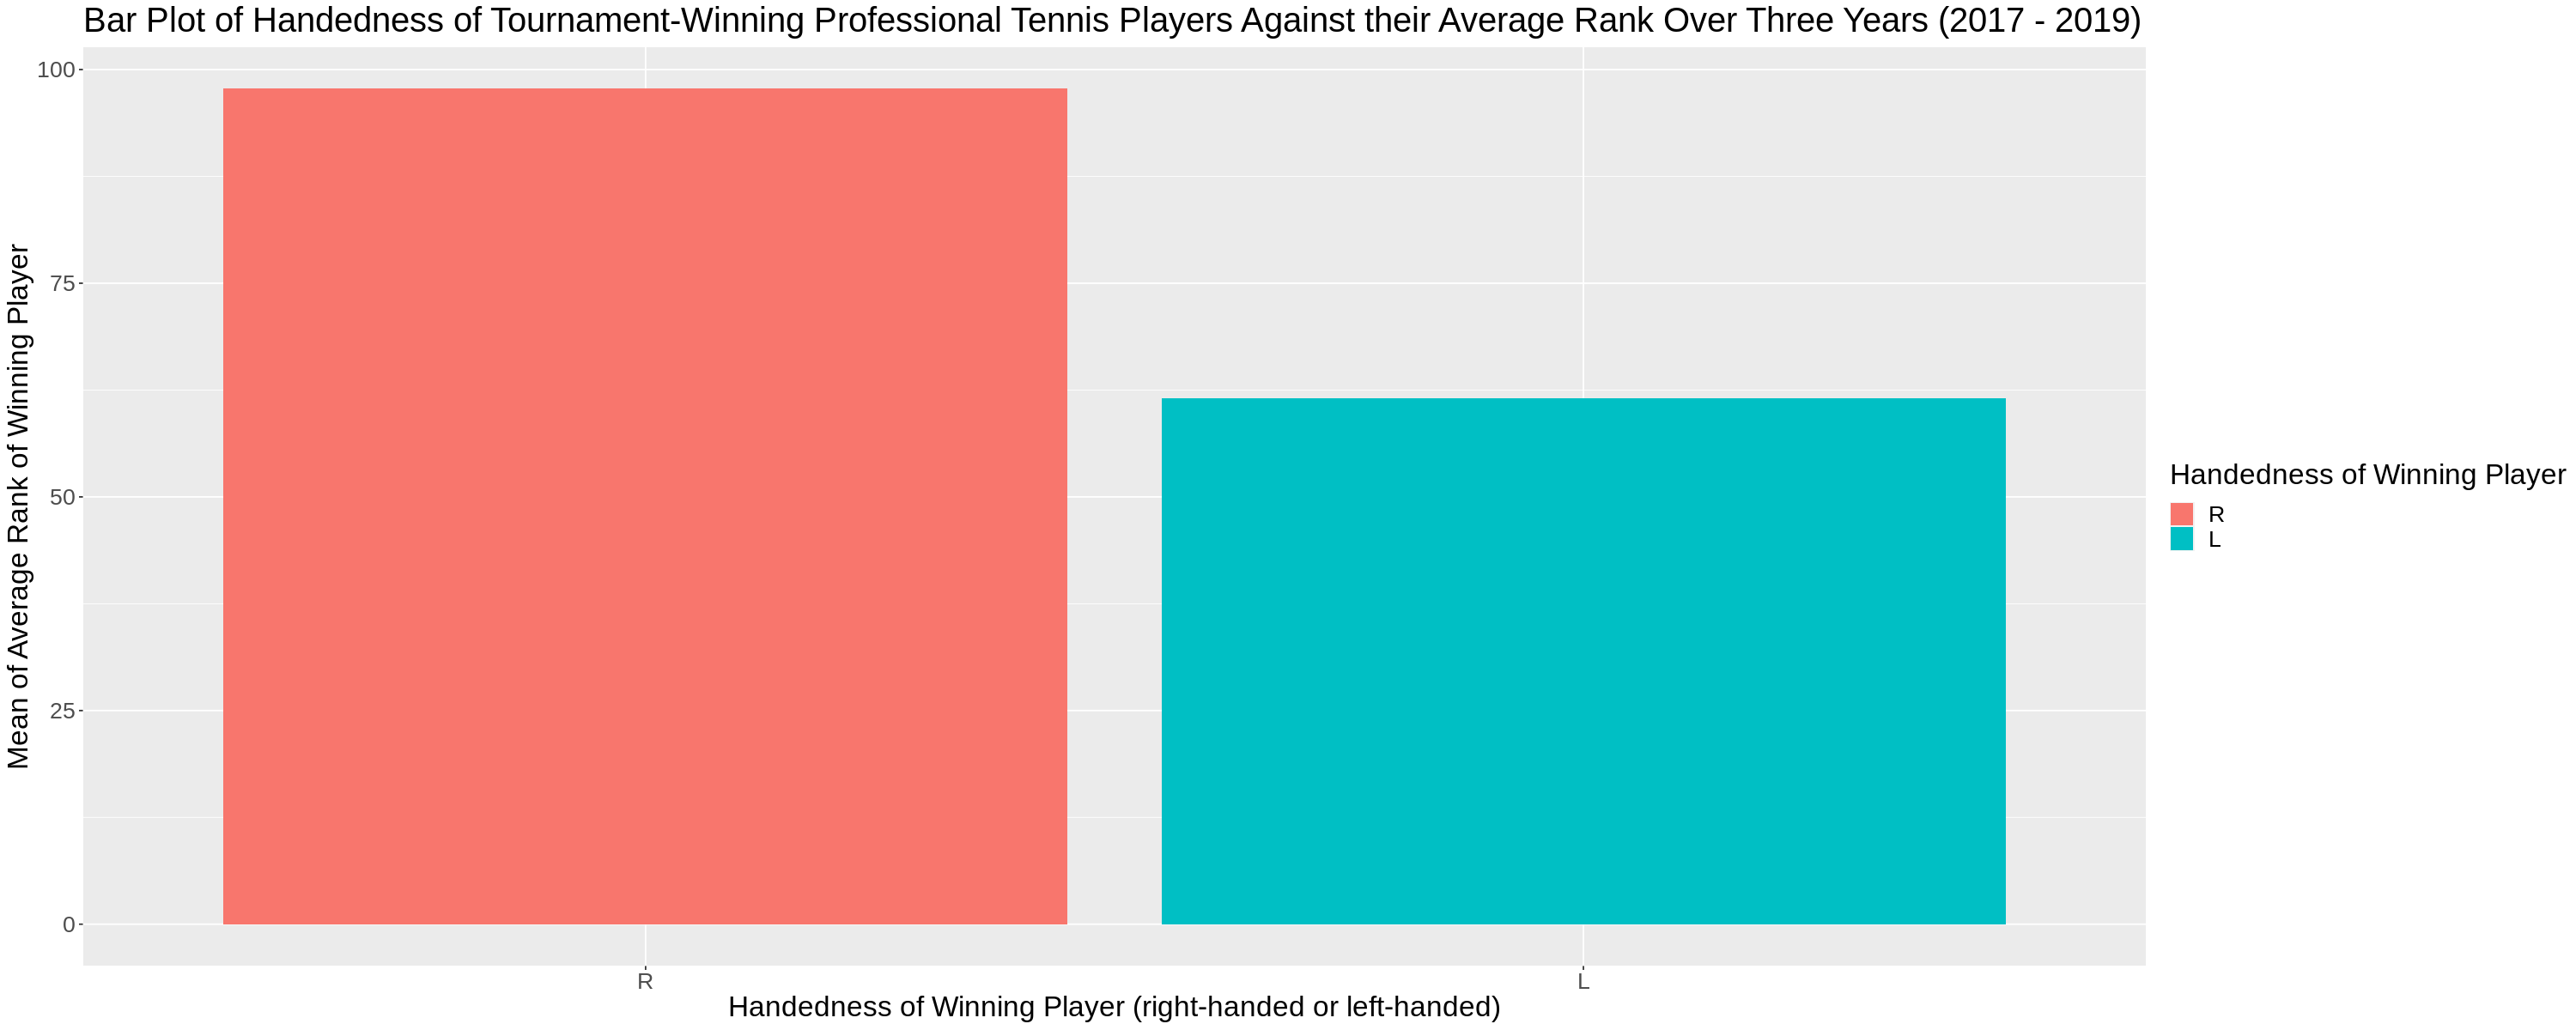

In [11]:
hand_data <- data_train %>%
group_by(winner_hand) %>%
summarize(winner_avg_rank_avg = mean(winner_avg_rank))

options(repr.plot.width = 25, repr.plot.height = 10)
data_train_hand_barplot <- hand_data %>%
    ggplot(aes(x=winner_hand, y=winner_avg_rank_avg, fill = winner_hand))+
        geom_bar(stat = "identity")+
        labs(x="Handedness of Winning Player (right-handed or left-handed)", y="Mean of Average Rank of Winning Player", fill = "Handedness of Winning Player")+
        ggtitle("Bar Plot of Handedness of Tournament-Winning Professional Tennis Players Against their Average Rank Over Three Years (2017 - 2019)")+
        theme (text = element_text (size = 20))
data_train_hand_barplot